# Project: Investigate No-Show Appointment Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I have selected Noshowappointment dataset, this dataset collects information from 100k medical appointments in Brazil and it is downloaded from <a href="https://www.kaggle.com/joniarroba/noshowappointments">kaggle</a> to analysis the factors why the patients were not shown for their appointments.
>

### Research Questions:
<ul>
    <li><b>What percentage of gender were visited the Hospital?</b></li>
    <li><b>Which Age Groups were not visited most?</b></li>
    <li><b>Which type of patients had more visit?</b></li>
</ul>

In [1]:
# Global import sections for all libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# Magic word to plot the visulization inline the notebook
%matplotlib inline
sns.set_style("darkgrid")

<a id='wrangling'></a>
## Data Wrangling

> In this section, I have checked the different aspects of the data like datatype, duplicate values, null values and overall information about the data

### General Properties

> Below i have loaded the data from my local machine which downloaded from kaggle.

In [2]:
# Loaded the csv file with the help of pandas function and printed the top 5 rows and all columns

data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Here we can see this data has 110527 rows with 14 columns
data.shape

(110527, 14)

In [4]:
# This is a very useful function which saves our time a lot and provides details about max, min, IQR values, 
#    standard deviation, mean and count by calling a single fucntion
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From the above output we can see that there are some outliers in <b>Age</b> columns

In [5]:
# info() provides the datatype of all the columns and number rows, columns and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> From the above output we can see that the schedule and appointment days columns were in object type which needs to be changed to date type

In [6]:
# Here we are checking for null values but this dataset has no null values
data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# There is no dupicate rows in this dataset which makes work our easy
data.duplicated().sum()

0

In [8]:
# This is the important column in this dataset, where No means patients visited and Yes means patients not shown
#   for their appointments
no_show=data['No-show'].unique()
no_show

array(['No', 'Yes'], dtype=object)

In [9]:
# Let's see the total count of peoples visited and not visited for their appointments
no=data.groupby('No-show').count()
no

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,,,,,,
No,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208
Yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


In [10]:
# we have duplicate values in patients columns from which we can assume the patients were visiting for their followup
# Checkups.
data['PatientId'].duplicated().value_counts()

False    61744
True     48783
Name: PatientId, dtype: int64

In [11]:
# Total number of Males and Females
gender_count=data['Gender'].value_counts()
gender_count

F    71840
M    38687
Name: Gender, dtype: int64

In [12]:
# Patients who were taken the scholarsip
data['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

### Data Cleaning: Now it's time to clean our data to get answers for the questions.

> Remove unwanted columns

In [13]:
# As first step let's remove the unwanted columns. Here the AppointmentID should unique for each appointments 
#      so we can remove the column.
data.drop('AppointmentID', axis=1, inplace=True)
data.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Now will let's fix the <b>Age</b> column

In [14]:
# As we seen there is some outliers in Age columns now i sorted to check what are all the Ages.
Age=np.sort(data['Age'])
Age

array([ -1,   0,   0, ..., 115, 115, 115], dtype=int64)

>-1 is an error and 115 is not a valid Age so we can drop the rows

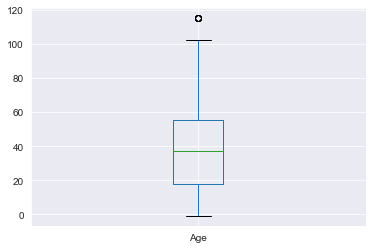

In [15]:
# I have plotted the Age column in box plot to check the outliers
data.Age.plot(kind="box");

> So now let's trim the data by removing the rows which as -1 ans 115 as Age

In [16]:
# Outlier data removed and here is the new shape for this dataset
data = data[(data.Age > -1 ) & (data.Age < 115)]
data.shape

(110521, 13)

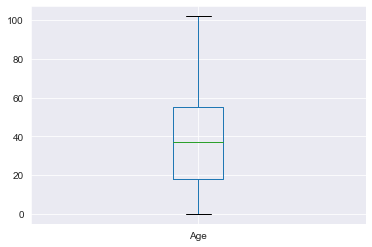

In [17]:
# For verification again will plot the data in boxplot, we can see that now it is clean
data.Age.plot(kind="box");

In [18]:
# Here I have converted the schedule and Appointment columns from object to datetime object
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'],format='%Y-%m-%dT%H:%M:%SZ')
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'],format='%Y-%m-%dT%H:%M:%SZ')

> Let's do some modification in No-show columns to make our analysis easy

In [19]:
#I have renamed the column to easly work in it query() function
data.rename(columns={"No-show":"Visited"},inplace=True)

In [20]:
#For easy understanding I have modified the values of the Visited column so that we can do some manipulations on it.
data['Visited'].replace({"No":1,"Yes":0},inplace=True)

In [21]:
# Here is the view after all data cleaning
data.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Visited
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [22]:
# And here is the datatypes after modifying the datas
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110521 non-null float64
Gender            110521 non-null object
ScheduledDay      110521 non-null datetime64[ns]
AppointmentDay    110521 non-null datetime64[ns]
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hipertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handcap           110521 non-null int64
SMS_received      110521 non-null int64
Visited           110521 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(8), object(2)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> Now with the cleaned data, let's try to get the answers for our questions

### Research Question 1: What Percentage of patients by gender were visited the Hospital?

In [23]:
# First will get the number of female and males by whether they visited or not for the appointments
gen_visit = data.groupby('Gender')['Visited'].value_counts()
gen_visit

Gender  Visited
F       1          57243
        0          14591
M       1          30962
        0           7725
Name: Visited, dtype: int64

> In total the Female Patients counts are more than Male patients

In [24]:
# Here we are getting the percentage of visits for both gender
fem_visit =round((gen_visit[0]/gender_count[0])*100,2)
mal_visit =round((gen_visit[2]/gender_count[1])*100,2)
# We are creating a new DataFrame to plot them in a bar chart
visit = pd.DataFrame([fem_visit,mal_visit], index =['Female','Male'])
visit

,0
Female,79.68
Male,80.03


> Though the over all male patient count is less than the female count, male patients percentage of visit is higer than
the female patients visit

In [25]:
# Here we are getting the percentage of non visits for both gender
fem_no_visit =round((gen_visit[1]/gender_count[0])*100,2)
mal_no_visit =round((gen_visit[3]/gender_count[1])*100,2)
# We are creating a new DataFrame to plot them in a bar chart
no_visit = pd.DataFrame([fem_no_visit,mal_no_visit], index =['Female','Male'])
no_visit

,0
Female,20.31
Male,19.97


> The non visit percentage is vice verse to the visit percentage

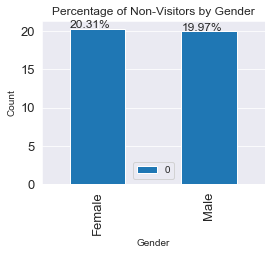

In [26]:
# Now will plot the values we obtain above for visit in a bar chart
non_show = no_visit.plot(kind='bar', figsize=(4,3), fontsize=13)
#This for loop is to add the percentage values to the bars because both were closer and it is hard to distinguish
for p in non_show.patches:
    non_show.annotate(str(p.get_height())+'%', (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=12)
plt.title("Percentage of Non-Visitors by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend();

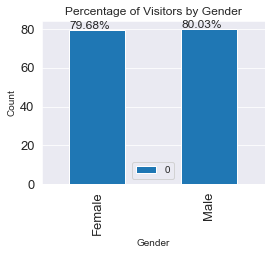

In [27]:
# Now will plot the values we obtain above for non visit in a bar chart
show = visit.plot(kind='bar', figsize=(4,3), fontsize=13)
#This for loop is to add the percentage values to the bars because both were closer and it is hard to distinguish
for p in show.patches:
    show.annotate(str(p.get_height())+'%', (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=12)
plt.title("Percentage of Visitors by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend();

### Summary:
    From the above 2 charts,
    
    1) Percentage of Females is higher than male who were not visiting as per the schedule
    2) Most of the males were visiting the hospital as per the schedule

### Research Question 2 Which Age Groups were not visited most?

In [28]:
# let's separate the rows by visited columns and add it into a variable. This variable contains the bool value based
#  on the test result.
show = (data.Visited == 1)
noshow = (data.Visited == 0)

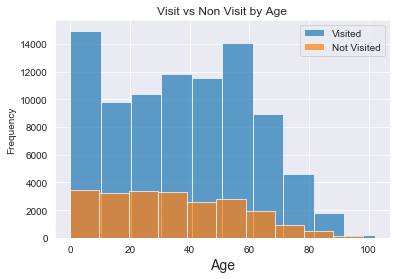

In [29]:
# Now let's plot them in a histogram
data[show].Age.plot.hist(alpha=0.7)
data[noshow].Age.plot.hist(alpha=0.7)
plt.legend(["Visited","Not Visited"]);
plt.xlabel("Age", fontsize=14)
plt.title("Visit vs Non Visit by Age");

> From this above hisogram we can see the Age group of both visited and non visited patients and we can clearly see patients from the age 20 to 40 were not visited most of the time.

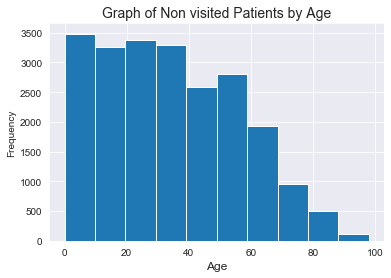

In [30]:
# Let's plot only for non visited patients
data[noshow].Age.plot(kind="hist");
plt.title("Graph of Non visited Patients by Age", fontsize=14);
plt.xlabel("Age",fontsize=12);

### Summary

In [31]:
print("The Average age of peoples missed the appointment is {:.2f}".format(data[noshow].Age.mean()))

The Average age of peoples missed the appointment is 34.31


### Research Question 3: Which type of patients had more visit?

In [32]:
# To Answer this question we need to get the average value for all the Health Problems.
dis_mean = data.groupby('Visited')['Hipertension','Diabetes','Alcoholism'].mean()
dis_mean

,Hipertension,Diabetes,Alcoholism
Visited,,,
0,0.169027,0.064080,0.030337
1,0.204388,0.073839,0.030418


> From the above we can find that patients with Hipertension visited most than any other patients and let's plot it in a chart

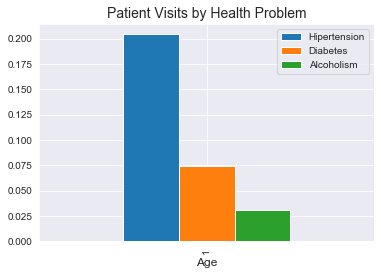

In [33]:
# Ploting only the visited average values
dis_mean[1:].plot(kind='bar');
plt.title("Patient Visits by Health Problem", fontsize=14)
plt.xlabel("Age",fontsize=12);

### Summary

> From the above chart we can easily understange that the patients with Hipertension were visiting hospital mostly.

## Limitations

> The results of this research were limited beacause information such as scholarship details and handicaped  patients was not provided, which limited the scope of research questions. 

<a id='conclusions'></a>
## Conclusions

> After analysing the 100k records of patient, by taking 3 independant columns Age, Gender and Health problem wit the dependent columsn No-show(Visited), we can say 

<ul>
    <li>The gender has differnt values in visiting the hospital as per the appointments.</li>
    <li> Age group is also a valid factor in determining the no-show appointments.</li>
    <li> Health issues also plays an important role is appointments.</li>
</ul>